# Import section

In [1]:
#One thing to calculate is the C/O ratio
import numpy as np
import matplotlib.pyplot as plt

In [33]:
#Write the atom abundances onto a file:
def wfile (name):

    atoms ='T'+'\t'+ 'H'+'\t'+ 'He'+'\t'+'Li'+'\t'+ 'C'+'\t'+ 'N'+'\t'+ 'O'+'\t'+ 'Na'+'\t'+ 'Mg'+'\t'+ 'Al'+'\t'+ 'Si'+'\t'+ ' S'+'\t'+ 'K'+'\t'+ 'Fe'

    f = open('output/'+name,'w')
    f.write(atoms+'\n')
    T = np.arange(500, 1650,50 )
    for i in range(T.shape[0]):
        #print 'Loop_',i,'T = ', T[i]
        res=chem(T[i])
        #print range(res[0].shape[0])
        f.write(T[i].astype(str)+'\t')
        for j in range(res[0].shape[0]):
            f.write(res[0][j].astype(str)+'\t')
        f.write('\n')
        
    f.close()

name = 'molec_ab.txt'
wfile(name)

This is the starting abundance:
[4.90e+08 1.86e+06 3.39e+07 2.69e+06 3.24e+07 1.41e+07 1.20e+05 2.82e+07]
6 	The atom is: K
1 	The atom is: Na
3 	The atom is: Al
5 	The atom is: S
7 	The atom is: Fe
[3.86156667e+08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
This is the starting abundance:
[4.90e+08 1.86e+06 3.39e+07 2.69e+06 3.24e+07 1.41e+07 1.20e+05 2.82e+07]
6 	The atom is: K
1 	The atom is: Na
3 	The atom is: Al
5 	The atom is: S
7 	The atom is: Fe
[3.86156667e+08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
This is the starting abundance:
[4.90e+08 1.86e+06 3.39e+07 2.69e+06 3.24e+07 1.41e+07 1.20e+05 2.82e+07]
6 	The atom is: K
1 	The atom is: Na
3 	The atom is: Al
5 	The atom is: S
7 	The atom is: Fe
[3.86156667e+08 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
This is the starting abundance:
[4

In [3]:
# Sort the calculated abundance based on atomic number:
def sort_atm(atm_sub, ab_sub, atm, ab):
    n = atm_sub.shape[0]
    for i in range(n):
        m = np.where(atm == atm_sub[i])[0][0]
        ab[m] = ab_sub[i]
    return ab
        

'''
Test:
a =  np.array([3.8726500e+08, 3.7252903e-09, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00]) 
b = np.array(['O', 'Mg', 'Al', 'Si', 'Fe'])
c = np.array([2.69e+08, 4.90e+08, 1.86e+06, 3.39e+07, 2.69e+06, 3.24e+07,
       1.41e+07, 1.20e+05, 2.82e+07])
d = np.array(['C', 'O', 'Na', 'Mg', 'Al', 'Si', 'S', 'K', 'Fe'])
e = sort_atm(b,a,d,c)    
'''

In [4]:
#Calculating Si abundance in the solid:
def Si_ab(atm_nm, ab):
    #Mg and Si:
    si = np.where(atm_nm == 'Si')
    mg = np.where(atm_nm == 'Mg')
    o = np.where(atm_nm == 'O')
    x = ab[mg]/ab[si]
    ab[mg] = ab[mg] - ab[si]*x
    ab[o] = ab[o] - ab[si]*(x+2)
    ab[si] = ab[si] - ab[si]
    #print ab
    return ab
    

## Side functions

In [28]:
#Calculating elemental abundances in the solid at a given T
def chem (T):
    fname = 'input/N_Molec.atm'
    aname = 'input/N_Atom.txt'
    atm_load = np.loadtxt(aname,dtype= str)
    atm_n = atm_load[:,1]
    atm_ab = atm_load[:,5].astype(float)
    dat_load = np.loadtxt(fname,dtype= str)
    dat = dat_load[1:-2,1:-1].astype(int)
    dat_T = dat_load[1:-2,-1].astype(float)
    ab = dat_load[11,1:-1].astype(float)
    ab_cp = np.copy(atm_ab)
    atm = dat_load[0,1:-1]
    mlc = dat_load[1:-2,0]
    sld = np.zeros(atm.shape[0])
    
    r = np.array([1.,1.,0.1,0.9,0.21,1,0.79,1.,1.,1.])
    
    
    t = np.where(dat_T >= T)
    dat_cp = np.copy(dat[t])
    n = np.where(dat_cp != 0 )
    n = np.unique(n[1])
    ab_srt = np.zeros_like(n)
    ab_srt = ab[n]
    set1 = np.argsort(ab_srt)
    atm_cp = atm[n]
    dat_cp = dat_cp[:,n]
    ab_r = np.zeros(ab_srt.shape[0])
    #print 'This is the starting abundance:\n',ab_srt
    for i in set1:
        if atm_cp[i] =='Si':
            ab_srt = Si_ab(atm_cp,ab_srt)
            break
        if atm_cp[i] =='Mg' or atm_cp[i] == 'O':
            break
    
        print i, '\t','The atom is:', atm_cp[i]
    
        atm_info = dat_cp[:,i]
        j = np.nonzero(atm_info)[0]
        
        N_list = np.zeros_like(dat_cp[j[0],:].astype(float))
    
        M_r = np.zeros_like(j)
        count = 0
        for j1 in j:
            M_r[count] = dat_cp[j1,i].astype(float)
            N_list = N_list +dat_cp[j1,:].astype(float)
            count += 1
        ab_r1 = ab_srt[i]*N_list/N_list[i]
        ab_srt = (ab_srt - ab_r1)
        ab_r = ab_r +ab_r1
        dat_cp[:,i] = 0
    ab_f= sort_atm(atm_cp, ab_srt, atm_n, ab_cp)
    return ab_f, atm_ab

This is the starting abundance:
[4.90e+08 2.69e+06]
1 	The atom is: Al


([<matplotlib.axis.XTick at 0x7fd71ff46e10>,
 <a list of 11 Text xticklabel objects>)

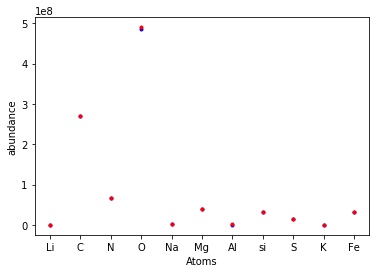

In [29]:
#Main 
T = 1500
res = chem(T)
#print res
bars = ('Li', 'C', 'N', 'O', 'Na', 'Mg', 'Al', 'si', 'S', 'K', 'Fe')
plt.figure()
y_pos = np.arange(len(bars))
plt.plot(y_pos,res[0][2:],'.b')
plt.plot(y_pos,res[1][2:],'.r')


y_pos = np.arange(len(bars))

# Add title and axis names
#plt.title('My title')
plt.xlabel('Atoms')
plt.ylabel('abundance')
 
# Limits for the Y axis
 
# Create names
plt.xticks(y_pos, bars)
 
#plt.yscale('log')